<a href="https://colab.research.google.com/github/KD1994/EIP-Sessions/blob/master/Week-3/Assignment_3_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.regularizers import l1, l2
from keras.optimizers import Adam, SGD
from keras.models import load_model
import warnings
import os

% matplotlib inline
warnings.filterwarnings("ignore")
np.random.seed(2017) 

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


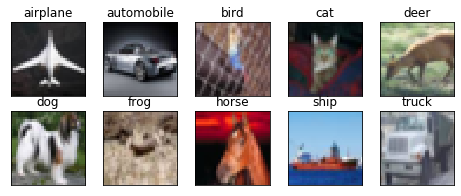

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid(True)
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid(True)
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Old Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





390/390 [==============================] - 10s 26ms/step - loss: 1.9611 - acc: 0.2466 - val_loss: 1.5215 - val_acc: 0.4347
Epoch 2/50
390/390 [==============================] - 7s 18ms/step - loss: 1.4296 - acc: 0.4775 - val_loss: 1.1909 - val_acc: 0.5578
Epoch 3/50
390/390 [==============================] - 7s 18ms/step - loss: 1.1999 - acc: 0.5697 - val_loss: 1.0086 - val_acc: 0.6366
Epoch 4/50
390/390 [==============================] - 7s 18ms/step - loss: 1.0592 - acc: 0.6270 - val_loss: 0.8966 - val_acc: 0.6893
Epoch 5/50
390/390 [==============================] - 7s 18ms/step - loss: 0.9352 - acc: 0.6750 - val_loss: 0.8339 - val_acc: 0.7113
Epoch 6/50
390/390 [==============================] - 7s 18ms/step - loss: 0.8604 - acc: 0.7037 - val_loss: 0.7637 - val_acc: 0.7350
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.8071 - acc: 0.7223 - v

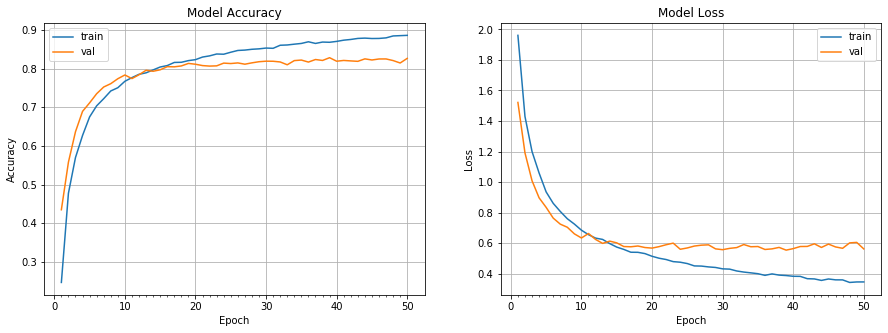

Accuracy on test data is: 82.65


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# New Model

In [0]:
model1 = Sequential()

# model.add(SeparableConv2D(32, 3, padding='same', activation='relu', use_bias=False, input_shape=(32, 32, 3)))  # 32
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(64, 3, padding='valid', activation='relu', use_bias=False))                          # 30
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 30
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(128, 3, padding='valid', activation='relu', use_bias=False))                         # 28
# model.add(BatchNormalization())
# model.add(Dropout(0.1)) 

# model.add(SeparableConv2D(32, 1, activation='relu', use_bias=False))                                           # 28                                       
# model.add(MaxPooling2D())                                                                                      # 14

# model.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 14
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(128, 3, padding='same', activation='relu', use_bias=False))                          # 14
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(32, 1, activation='relu', use_bias=False))                                           # 14                                       
# model.add(MaxPooling2D())                                                                                      # 7

# model.add(SeparableConv2D(32, 3, padding='same', activation='relu', use_bias=False))                           # 7
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(64, 3, padding='valid', activation='relu', use_bias=False))                          # 5
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 5
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(SeparableConv2D(128, 3, padding='valid', activation='relu', use_bias=False))                         # 3
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(10, 1, activation='relu', use_bias=False))                                           # 3
# model.add(SeparableConv2D(10, 3, padding='valid', activation='relu', use_bias=False))                          # 1
# model.add(Flatten())
# model.add(Activation('softmax'))

model1.add(SeparableConv2D(32, 3, padding='same', activation='relu', use_bias=False, input_shape=(32, 32, 3)))  # 32 RF--> 3
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 32 RF--> 5
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(64, 3, padding='valid', activation='relu', use_bias=False))                          # 30 RF--> 7
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(128, 3, padding='same', activation='relu', use_bias=False))                          # 30 RF--> 9
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(128, 3, padding='valid', activation='relu', use_bias=False))                         # 28 RF--> 11
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) 

model1.add(SeparableConv2D(32, 1, activation='relu', use_bias=False))                                           # 28 RF--> 11                                      
model1.add(MaxPooling2D())                                                                                      # 14 RF--> 12

model1.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 14 RF--> 16
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(128, 3, padding='same', activation='relu', use_bias=False))                          # 14 RF--> 20
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(32, 1, activation='relu', use_bias=False))                                           # 14 RF--> 20                                      
model1.add(MaxPooling2D())                                                                                      # 7  RF--> 22

model1.add(SeparableConv2D(32, 3, padding='same', activation='relu', use_bias=False))                           # 7  RF--> 26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(64, 3, padding='valid', activation='relu', use_bias=False))                          # 5  RF--> 34
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False))                           # 5  RF--> 42
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(SeparableConv2D(128, 3, padding='valid', activation='relu', use_bias=False))                         # 3  RF--> 50
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(10, 1, activation='relu', use_bias=False))                                           # 3  RF--> 50
model1.add(SeparableConv2D(10, 3, padding='valid', activation='relu', use_bias=False))                          # 1  RF--> 58
model1.add(Flatten())
model1.add(Activation('softmax'))



model1.compile(optimizer=Adam(0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 64)        2336      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 30, 30, 64)       

In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True,
                             rotation_range=10, )

# Save the best weights to model
op_file = os.path.join(os.getcwd(), 'best_weights.hdf5')
checkpoint = ModelCheckpoint(op_file, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.119 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 33s 84ms/step - loss: 1.7711 - acc: 0.3619 - val_loss: 2.6390 - val_acc: 0.3782

Epoch 00001: val_acc improved from -inf to 0.37820, saving model to /content/best_weights.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026809651.
390/390 [==============================] - 28s 72ms/step - loss: 1.2772 - acc: 0.5385 - val_loss: 1.4015 - val_acc: 0.5469

Epoch 00002: val_acc improved from 0.37820 to 0.54690, saving model to /content/best_weights.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024232633.
390/390 [==============================] - 28s 72ms/step - loss: 1.1109 - acc: 0.6048 - val_loss: 1.1680 - val_acc: 0.6058

Epoch 00003: val_acc improved from 0.54690 to 0.60580, saving model to /content/best_wei

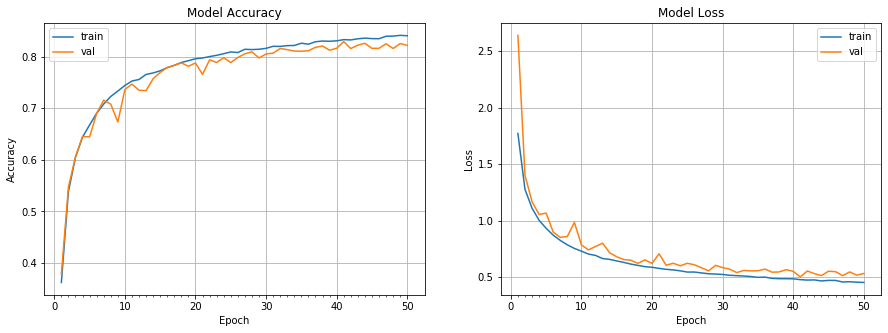

Accuracy on test data is: 82.93


In [0]:
# plot model history
plot_model_history(model_info)
# compute test accuracy

# Load Saved Model
best_model = load_model('/content/best_weights.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, best_model))

# New Model-2

In [0]:
model2 = Sequential()

model2.add(SeparableConv2D(32, 3, padding='same', depth_multiplier=2, activation='relu', use_bias=False, input_shape=(32, 32, 3))) #32  RF --> 3
model2.add(BatchNormalization())

model2.add(SeparableConv2D(64, 3, padding='valid', activation='relu', use_bias=False)) # 30  RF --> 5
model2.add(BatchNormalization())
model2.add(Dropout(0.05))

model2.add(SeparableConv2D(128, 3, padding='same', depth_multiplier=2, activation='relu', use_bias=False)) # 30  RF --> 7
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(32, 1, padding='same', activation='relu', use_bias=False)) # 30  RF --> 7
model2.add(MaxPooling2D()) # 15  RF --> 8

model2.add(SeparableConv2D(64, 3, padding='same', activation='relu', use_bias=False)) # 15  RF --> 12
model2.add(BatchNormalization())
model2.add(Dropout(0.05))

model2.add(SeparableConv2D(64, 3, padding='same', depth_multiplier=1, activation='relu', use_bias=False)) # 15  RF --> 16
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, 3, padding='valid', activation='relu', use_bias=False)) # 13  RF --> 20
model2.add(BatchNormalization())
model2.add(Dropout(0.05))

model2.add(SeparableConv2D(128, 3, padding='valid', depth_multiplier=1, activation='relu', use_bias=False)) # 11  RF --> 24
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(32, 1, padding='same', activation='relu', use_bias=False)) # 11  RF --> 24
model2.add(MaxPooling2D()) # 5  RF --> 26

model2.add(SeparableConv2D(64, 3, padding='valid', depth_multiplier=2, activation='relu', use_bias=False)) # 3  RF --> 34
model2.add(BatchNormalization())
model2.add(Dropout(0.05))

model2.add(SeparableConv2D(10, 1, padding='same', activation='relu', use_bias=False)) # 3   RF --> 34
model2.add(SeparableConv2D(10, 3, activation='relu', use_bias=False)) # 1  RF --> 42

model2.add(Flatten())
model2.add(Activation('softmax'))

model2.compile(Adam(0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_25 (Separab (None, 32, 32, 32)        246       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_26 (Separab (None, 30, 30, 64)        2336      
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_27 (Separab (None, 30, 30, 128)       17536     
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 128)      

In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# Save the best weights to model
op_file = os.path.join(os.getcwd(), 'best_weights.hdf5')
checkpoint = ModelCheckpoint(op_file, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 callbacks=[checkpoint])    #, LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/50
390/390 [==============================] - 32s 83ms/step - loss: 1.7546 - acc: 0.3659 - val_loss: 1.5890 - val_acc: 0.4776

Epoch 00001: val_acc improved from -inf to 0.47760, saving model to /content/best_weights.hdf5
Epoch 2/50
390/390 [==============================] - 30s 76ms/step - loss: 1.1866 - acc: 0.5871 - val_loss: 1.4148 - val_acc: 0.5595

Epoch 00002: val_acc improved from 0.47760 to 0.55950, saving model to /content/best_weights.hdf5
Epoch 3/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8988 - acc: 0.6830 - val_loss: 1.0163 - val_acc: 0.6613

Epoch 00003: val_acc improved from 0.55950 to 0.66130, saving model to /content/best_weights.hdf5
Epoch 4/50
390/390 [==============================] - 30s 76ms/step - loss: 0.7791 - acc: 0.7259 - val_loss: 0.8604 - val_acc: 0.7019

Epoch 00004: val_acc improved from 0.66130 to 0.70190, saving model to /content/best_weights.hdf5
Epoch 5/50
390/390 [==============================] - 30s 76ms/step - l

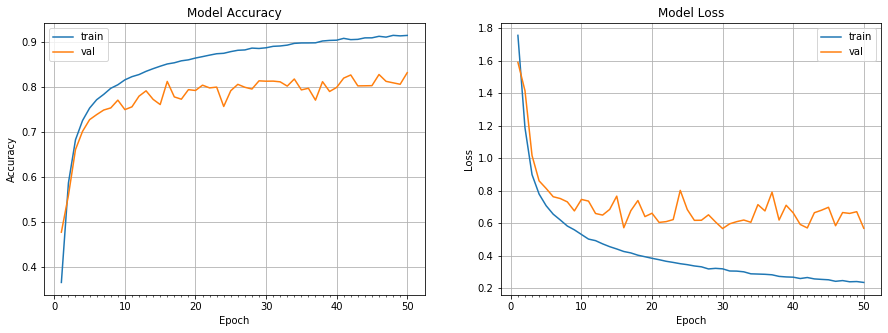

Accuracy on test data is: 83.24


In [0]:
# plot model history
plot_model_history(model_info)
# compute test accuracy

# Load Saved Model
best_model = load_model('/content/best_weights.hdf5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, best_model))